# All Movies Analsyis: The Basics Part 2
A continuation of [All Movies_Analysis: The basics](), with saved figures for reference!

## 1) Token count

In [1]:
import nltk

In [2]:
import pandas as pd

In [6]:
movie_df = pd.read_pickle(r"C:/Users/cassi/Desktop/Data_Science/Animated-Movie-Gendered-Dialogue/private/all_tagged_dialogue.pkl")

In [7]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13442 entries, 0 to 14095
Data columns (total 16 columns):
Disney_Period       13442 non-null object
Gender              13442 non-null object
Movie               13442 non-null object
Role                13442 non-null object
Song                13442 non-null object
Speaker             13442 non-null object
Speaker_Status      13442 non-null object
Text                13442 non-null object
UTTERANCE_NUMBER    13442 non-null int64
Year                13442 non-null int64
Tokens              13442 non-null object
Types               13442 non-null object
Token_Count         13442 non-null int64
Type_Count          13442 non-null int64
POS                 13442 non-null object
Tag_Freq            13442 non-null object
dtypes: int64(4), object(12)
memory usage: 1.1+ MB


In [8]:
movie_df[["Token_Count", "Type_Count"]].describe()

,Token_Count,Type_Count
count,13442.000000,13442.000000
mean,12.088826,10.152581
std,12.980644,8.822760
min,1.000000,1.000000
25%,5.000000,4.000000
50%,8.000000,8.000000
75%,15.000000,13.000000
max,300.000000,140.000000


Average token count per line is about 12 tokens, average type count is about 10. Somewhat large standard deviations.

In [10]:
print(movie_df.Movie.value_counts())

Rise of the Guardians         928
Shrek 3                       868
Aladdin                       785
The Croods                    766
Frozen                        740
How to Train Your Dragon      726
Shrek                         722
How to Train Your Dragon 2    696
Kung Fu Panda                 689
Antz                          644
The Princess and the Frog     644
Beauty and the Beast          638
Megamind                      617
Pocahontas                    556
Tangled                       526
Mulan                         509
Cinderella                    475
Sleeping Beauty               434
Brave                         410
The Little Mermaid            377
Moana                         355
Snow White                    337
Name: Movie, dtype: int64


In [11]:
print(movie_df.Movie.value_counts().describe()) # shows average number of lines in each movie


count     22.000000
mean     611.000000
std      166.979611
min      337.000000
25%      483.500000
50%      641.000000
75%      725.000000
max      928.000000
Name: Movie, dtype: float64


The overall average number of lines per movie is 611, with an std of 167.

In [14]:
movie_df.Gender.value_counts()

m    8914
f    4216
n     312
Name: Gender, dtype: int64

For this analysis, let's get rid of 'n' values--just looking at male and female characters. This will drop the number of total entries by 312

In [15]:
movie_df = movie_df[movie_df.Gender != 'n']

In [16]:
movie_df.Gender.value_counts()

m    8914
f    4216
Name: Gender, dtype: int64

In [91]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13130 entries, 0 to 14095
Data columns (total 16 columns):
Disney_Period       13130 non-null object
Gender              13130 non-null object
Movie               13130 non-null object
Role                13130 non-null object
Song                13130 non-null object
Speaker             13130 non-null object
Speaker_Status      13130 non-null object
Text                13130 non-null object
UTTERANCE_NUMBER    13130 non-null int64
Year                13130 non-null int64
Tokens              13130 non-null object
Types               13130 non-null object
Token_Count         13130 non-null int64
Type_Count          13130 non-null int64
POS                 13130 non-null object
Tag_Freq            13130 non-null object
dtypes: int64(4), object(12)
memory usage: 1.6+ MB


## Speaker Gender?

In [17]:
movie_df.groupby('Gender', sort = False)[["Token_Count", "Type_Count"]].describe()

Token_Count                                                    \
             count       mean        std  min  25%  50%   75%    max   
Gender                                                                 
f           4216.0  11.462049  13.554476  1.0  4.0  8.0  14.0  300.0   
m           8914.0  12.481714  12.819819  1.0  5.0  9.0  16.0  290.0   

       Type_Count                                                   
            count       mean       std  min  25%  50%   75%    max  
Gender                                                              
f          4216.0   9.652040  8.921093  1.0  4.0  7.0  12.0  140.0  
m          8914.0  10.470271  8.828004  1.0  5.0  8.0  14.0  138.0

Male speakers average 1 more tokens than female speakers, and almost 1 more type than female speakers.

# Visualizations

In [18]:
from matplotlib import pyplot as plt

In [20]:
f_lines = movie_df[movie_df.Gender == 'f']
m_lines = movie_df[movie_df.Gender == 'm']
f_in_year = f_lines.groupby('Year')['Speaker'].describe()['unique']
m_in_year = m_lines.groupby('Year')['Speaker'].describe()['unique']

#average token count for female lines in each movie
f_tok_by_year = f_lines.groupby(['Year', 'Movie'])["Token_Count"].describe()["mean"]
tok_per_f_by_year = f_tok_by_year / f_in_year

#average type count for female lines in each movie
f_type_by_year = f_lines.groupby(['Year', 'Movie'])["Type_Count"].describe()["mean"]
print(f_tok_by_year)
print(f_type_by_year)

Year  Movie                     
1937  Snow White                    17.650407
1950  Cinderella                    13.184615
1959  Sleeping Beauty               10.132075
1989  The Little Mermaid            15.017094
1991  Beauty and the Beast          10.010050
1992  Aladdin                        8.177966
1995  Pocahontas                     9.231579
1998  Antz                          12.520468
      Mulan                          9.168919
2001  Shrek                         12.784615
2007  Shrek 3                        8.915254
2008  Kung Fu Panda                 10.611111
2009  The Princess and the Frog     14.244444
2010  How to Train Your Dragon       8.250000
      Megamind                      11.900763
      Tangled                       12.538983
2012  Brave                         12.492063
      Rise of the Guardians          9.882812
2013  Frozen                         9.697143
      The Croods                     8.920755
2014  How to Train Your Dragon 2    10.692308
2

## Average Token Count per Line in Each Movie by Gender

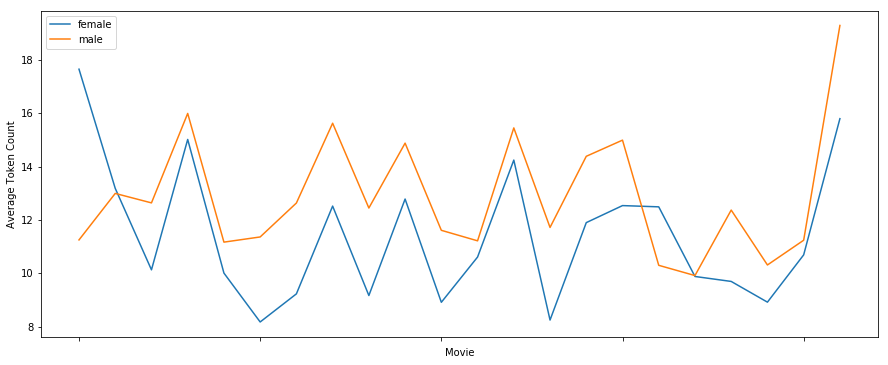

In [38]:
f_lines = movie_df[movie_df.Gender == 'f']
m_lines = movie_df[movie_df.Gender == 'm']

f_tok_by_year = f_lines.groupby(['Year', 'Movie'])["Token_Count"].describe()["mean"]

m_tok_by_year = m_lines.groupby(['Year', 'Movie'])["Token_Count"].describe()["mean"]  

f_tok_by_year.plot(figsize = (15,6))
m_tok_by_year.plot(figsize = (15,6))
plt.legend(['female', 'male'])
plt.xticks = f_tok_by_year.index
plt.xlabel('Movie')
plt.ylabel('Average Token Count')
plt.show()                                                                           

Interesting! Overall it seems that overtime lines have gotten shorter, and males always have longer lines than females, but the gap has definitely decreased!

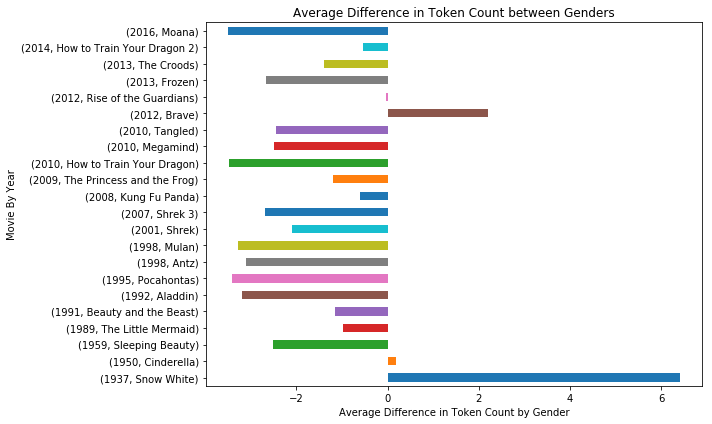

<Figure size 432x288 with 0 Axes>

In [115]:
#let's analyze this gap...
f_m_tok_diff = f_tok_by_year - m_tok_by_year
#anything positive indicates females spoke more per line, anything negative indicates men spoke more...
f_m_tok_diff.plot(kind='barh', figsize=(10,6))
plt.ylabel('Movie By Year')
plt.xlabel('Average Difference in Token Count by Gender')
plt.title('Average Difference in Token Count between Genders')
plt.tight_layout()
plt.show()
plt.savefig(r'C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_tok_diff_by_gen.png')

## Average Type Count per Line in Each Movie By Gender

In [28]:
f_type_by_year

Year  Movie                     
1937  Snow White                    13.406504
1950  Cinderella                    10.803846
1959  Sleeping Beauty                8.908805
1989  The Little Mermaid            11.846154
1991  Beauty and the Beast           8.914573
1992  Aladdin                        7.652542
1995  Pocahontas                     8.157895
1998  Antz                          10.678363
      Mulan                          8.128378
2001  Shrek                         10.807692
2007  Shrek 3                        8.022599
2008  Kung Fu Panda                  9.277778
2009  The Princess and the Frog     12.025926
2010  How to Train Your Dragon       7.358696
      Megamind                      10.396947
      Tangled                       10.006780
2012  Brave                         10.292063
      Rise of the Guardians          8.765625
2013  Frozen                         8.042857
      The Croods                     7.822642
2014  How to Train Your Dragon 2     9.473373
2

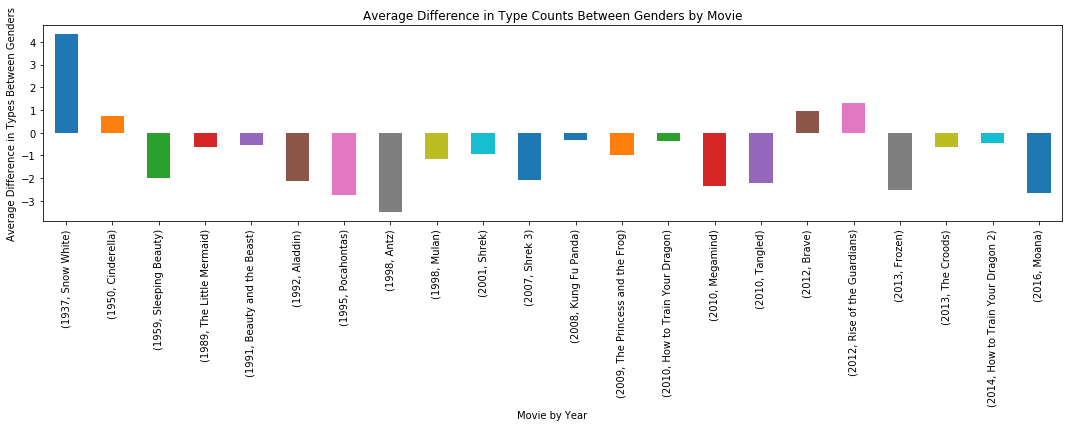

In [93]:
#let's analyze this gap...
f_m_type_diff = f_type_by_year - m_type_by_year
#anything positive indicates females spoke more, anything negative indicates men spoke more...
f_m_type_diff.plot(kind='bar', figsize=(15,6))
plt.xlabel('Movie by Year')
plt.ylabel('Average Difference in Types Between Genders')
plt.title('Average Difference in Type Counts Between Genders by Movie')
plt.tight_layout()
plt.savefig(r'C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_type_diff_by_gen.png')

Looks like a similar trend...Snow white and Brave seem to be outliers here. Statistical testing will have to be performed.

## Average Token Count/Line by Gender in Each Movie

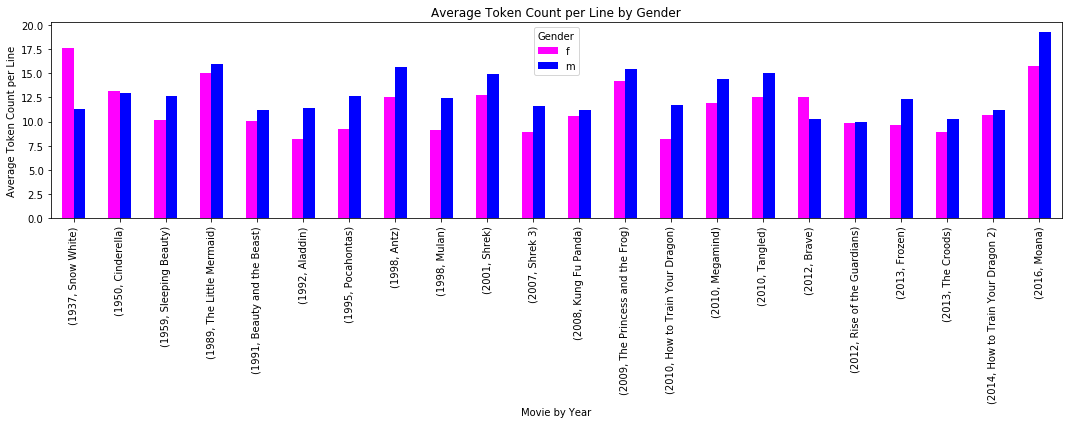

In [109]:
subgroup_2 = movie_df.groupby(['Year','Movie','Gender'])["Token_Count"].describe()['mean']
subgroup_2.unstack().plot.bar(color=['magenta', 'blue', 'green'], figsize = (15,6))
plt.title('Average Token Count per Line by Gender')
plt.xlabel('Movie by Year')
plt.ylabel('Average Token Count per Line')
plt.tight_layout()
plt.savefig(r'C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_tok_per_line_gen.png')

Overall, female speakers only have longer lines in Snow White, Cinderella, and Brave

P.S. The graph above of average token count by gender in each film. (A different visualization of the same stats found in the line plots above)

## Average Type Count/Line by Gender in Each Movie

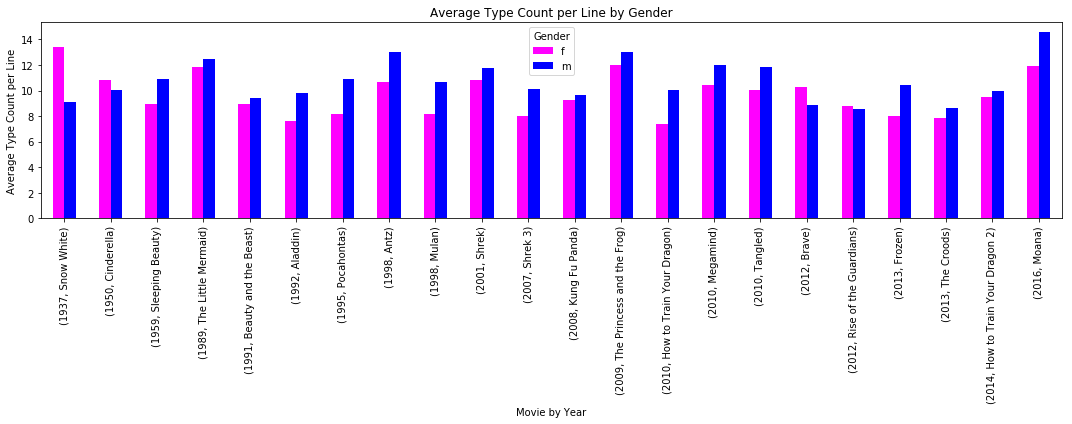

In [95]:
subgroup_3 = movie_df.groupby(['Year','Movie','Gender'])["Type_Count"].describe()['mean']
subgroup_3.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15,6))
plt.title('Average Type Count per Line by Gender')
plt.xlabel('Movie by Year')
plt.ylabel('Average Type Count per Line')
plt.tight_layout()
plt.savefig(r'C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_type_per_line_gen.png')

The average type count is higher for female speakers in guardians!!

In [44]:
#Seeing number of lines by gender for each movie
#aka, total number of lines per gender in each movie
total_lines_per_gen = movie_df.groupby(['Year','Movie'])['Gender'].value_counts()
total_lines_per_gen

Year  Movie                       Gender
1937  Snow White                  m         214
                                  f         123
1950  Cinderella                  f         260
                                  m         194
1959  Sleeping Beauty             f         318
                                  m         114
1989  The Little Mermaid          m         259
                                  f         117
1991  Beauty and the Beast        m         436
                                  f         199
1992  Aladdin                     m         657
                                  f         118
1995  Pocahontas                  m         365
                                  f         190
1998  Antz                        m         387
                                  f         171
      Mulan                       m         346
                                  f         148
2001  Shrek                       m         586
                                  f         130

In [45]:
#The total number of female/male characters per movie
num_char_per_gen = movie_df.groupby(['Year','Movie','Gender'])["Speaker"].unique().map(len)

In [46]:
num_char_per_gen

Year  Movie                       Gender
1937  Snow White                  f          2
                                  m         13
1950  Cinderella                  f          8
                                  m         11
1959  Sleeping Beauty             f          7
                                  m          8
1989  The Little Mermaid          f          8
                                  m         15
1991  Beauty and the Beast        f          8
                                  m         18
1992  Aladdin                     f          2
                                  m         22
1995  Pocahontas                  f          3
                                  m         13
1998  Antz                        f          7
                                  m         13
      Mulan                       f          5
                                  m         28
2001  Shrek                       f          3
                                  m         28
2007  Shrek 3      

In [47]:
#total number of lines / total number of characters
avg_lines_per_gen = total_lines_per_gen.divide(num_char_per_gen)
# This returns movies in alphabetical order, not chronological order. Need to reindex

In [48]:
avg_lines_per_gen = avg_lines_per_gen.reindex(index = total_lines_per_gen.index)
avg_lines_per_gen

Year  Movie                       Gender
1937  Snow White                  m          16.461538
                                  f          61.500000
1950  Cinderella                  f          32.500000
                                  m          17.636364
1959  Sleeping Beauty             f          45.428571
                                  m          14.250000
1989  The Little Mermaid          m          17.266667
                                  f          14.625000
1991  Beauty and the Beast        m          24.222222
                                  f          24.875000
1992  Aladdin                     m          29.863636
                                  f          59.000000
1995  Pocahontas                  m          28.076923
                                  f          63.333333
1998  Antz                        m          29.769231
                                  f          24.428571
      Mulan                       m          12.357143
                        

## Total Lines per Gender in Each Movie

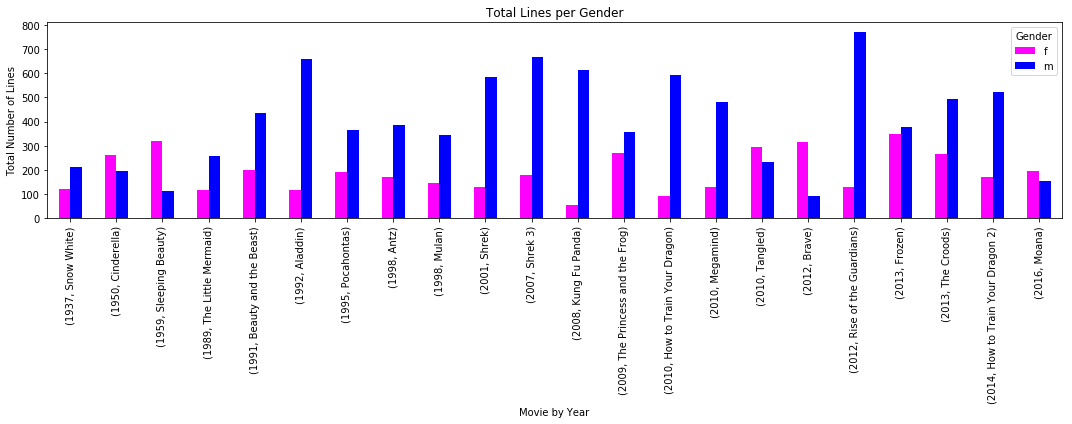

In [96]:
total_lines_per_gen.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15, 6))
plt.title('Total Lines per Gender')
plt.xlabel('Movie by Year')
plt.ylabel('Total Number of Lines')
plt.tight_layout()
plt.savefig(r'C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\total_lines_by_gen.png')

In terms of total number of lines, men dominate.

## Average Number of Lines per Gender in Each Movie
Here, I divide the total number of lines per gender by the number of male and female characters in each movie, to get the average number of lines uttered by men and women in each movie

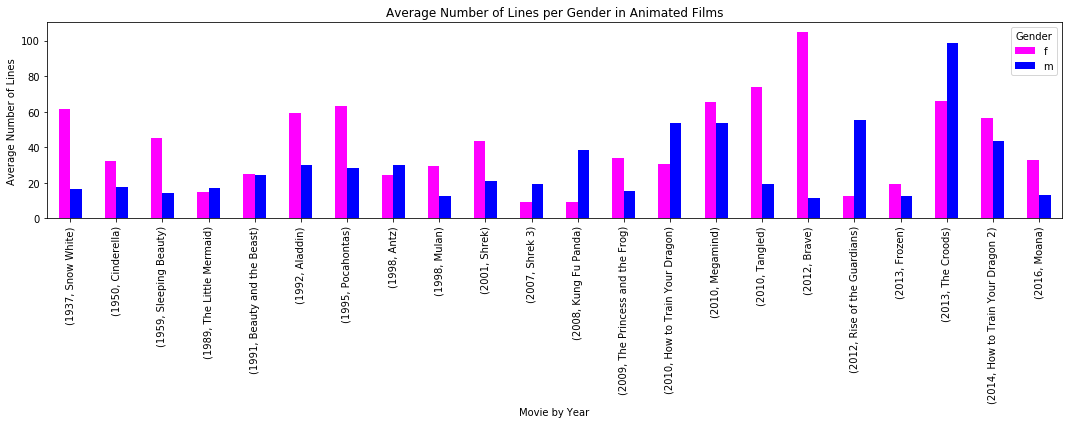

In [97]:
### Oh...interesting....
avg_lines_per_gen.unstack().plot.bar(color = ['magenta', 'blue'], figsize=(15,6))
plt.title('Average Number of Lines per Gender in Animated Films')
plt.ylabel('Average Number of Lines')
plt.xlabel('Movie by Year')
plt.tight_layout()
plt.savefig(r'C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_num_line_by_gen.png')

When you take the number of male and female characters into account, you find that for a few Dreamworks movies, on average female characters tend to have more lines. This makes sense for movies like Shrek and HTTYD, which have one main female character with a lot of lines. Rise of the guardians, on the other hand, consists of several minor female characters. Overall, female characters average more lines in the Disney Princess movies, but not in Dreamworks movies.

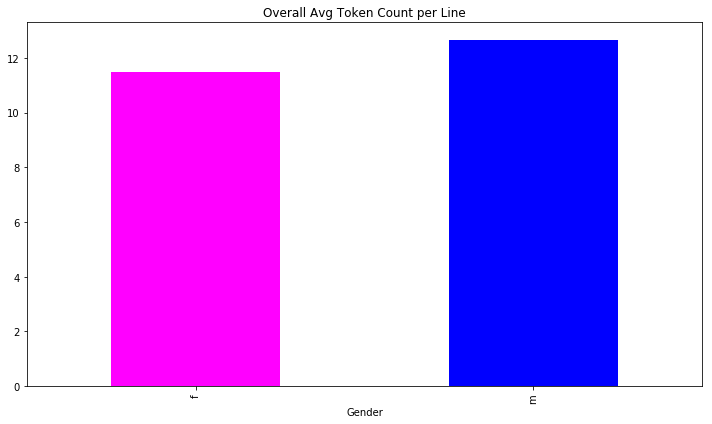

In [124]:
#Overall average...
gen_lines_2 = movie_df_new.groupby(['Gender'])["Token_Count"].describe()["mean"]
gen_lines_2.plot.bar(color=['magenta', 'blue'], figsize = (10,6))
#overall, men tend to have longer lines...
plt.title("Overall Avg Token Count per Line")
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\overall_avg_tok_gen.png")

In [45]:
#pickle our dataframe annotated with tokens/types and counts
#movie_df.to_pickle(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\private\all_movies_toktype.pkl")

# Distributions by Role
Let's do the same for protagonists, antagonists, and helpers.

In [52]:
movie_df_new = movie_df[movie_df.Role != 'N']

In [53]:
movie_df_new.info() #11320

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11320 entries, 0 to 14095
Data columns (total 16 columns):
Disney_Period       11320 non-null object
Gender              11320 non-null object
Movie               11320 non-null object
Role                11320 non-null object
Song                11320 non-null object
Speaker             11320 non-null object
Speaker_Status      11320 non-null object
Text                11320 non-null object
UTTERANCE_NUMBER    11320 non-null int64
Year                11320 non-null int64
Tokens              11320 non-null object
Types               11320 non-null object
Token_Count         11320 non-null int64
Type_Count          11320 non-null int64
POS                 11320 non-null object
Tag_Freq            11320 non-null object
dtypes: int64(4), object(12)
memory usage: 972.8+ KB


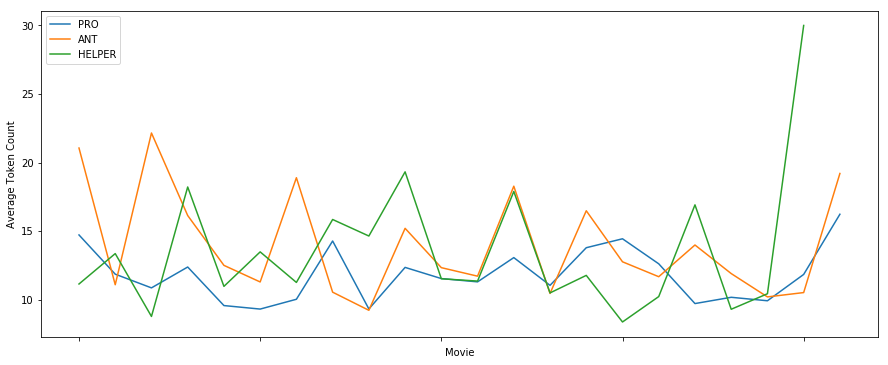

In [58]:
p_lines = movie_df_new[movie_df_new.Role == 'PRO']
a_lines = movie_df_new[movie_df_new.Role == 'ANT']
h_lines = movie_df_new[movie_df_new.Role == 'HELPER']

p_tok_by_year = p_lines.groupby(['Year', 'Movie'])["Token_Count"].describe()["mean"]

a_tok_by_year = a_lines.groupby(['Year', 'Movie'])["Token_Count"].describe()["mean"]  

h_tok_by_year = h_lines.groupby(['Year', 'Movie'])["Token_Count"].describe()["mean"] 

p_tok_by_year.plot(figsize = (15,6))
a_tok_by_year.plot(figsize = (15,6))
h_tok_by_year.plot(figsize = (15,6))
plt.legend(['PRO', 'ANT', 'HELPER'])
plt.xlabel('Movie')
plt.ylabel('Average Token Count')
plt.show()

In [59]:
#this is messy....let's do a bar graph
role_lines = movie_df_new.groupby(['Year', 'Movie', 'Role'])["Token_Count"].describe()["mean"]

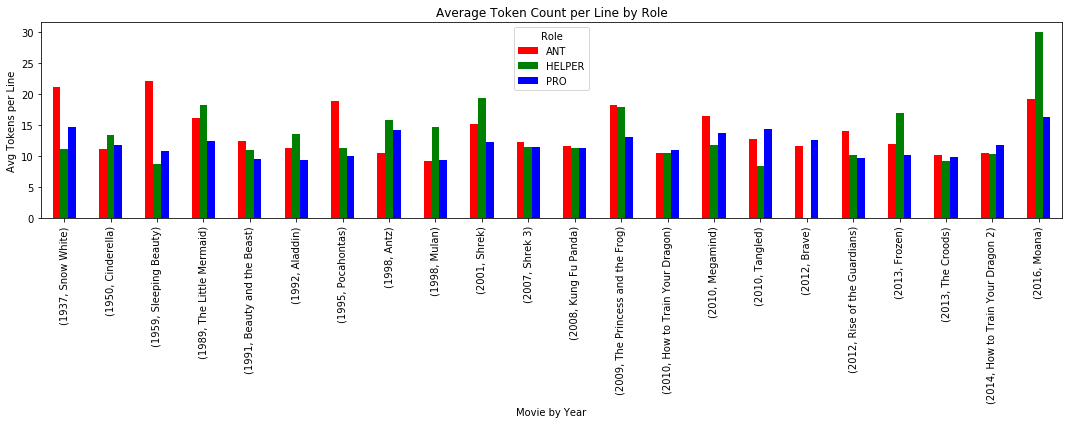

In [116]:
role_lines.unstack().plot.bar(color=['red', 'green', 'blue'], figsize = (15,6))
plt.title("Average Token Count per Line by Role")
plt.xlabel("Movie by Year")
plt.ylabel("Avg Tokens per Line")
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_tok_per_line_role.png")

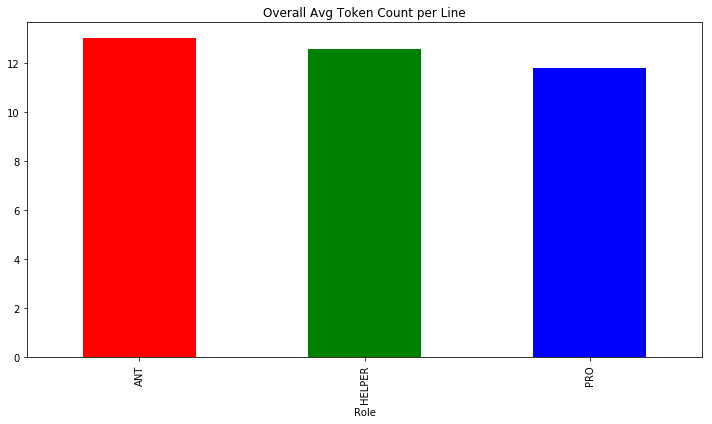

In [120]:
#Overall average...
role_lines_2 = movie_df_new.groupby(['Role'])["Token_Count"].describe()["mean"]
role_lines_2.plot.bar(color=['red', 'green', 'blue'], figsize = (10,6))
#overall, antagonists tend to have longer lines...
plt.title("Overall Avg Token Count per Line")
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\overall_avg_tok_role.png")

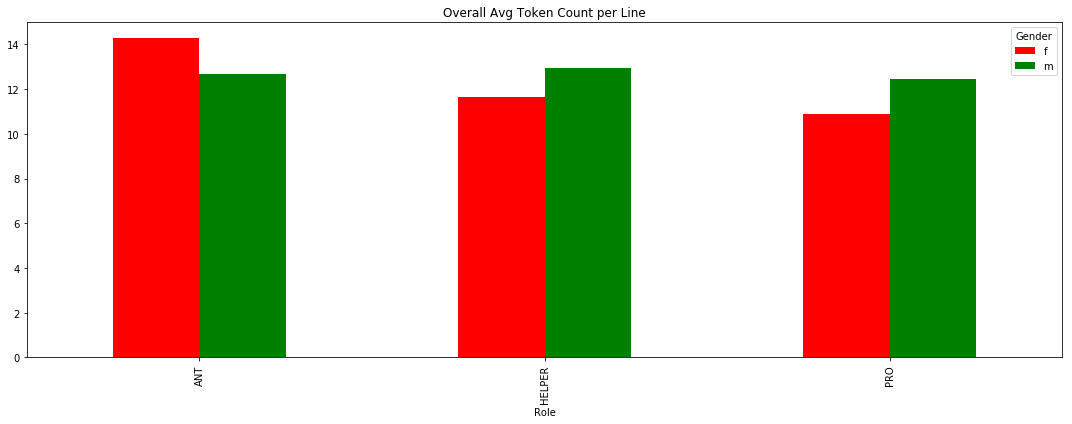

In [121]:
role_lines_3 = movie_df_new.groupby(['Role', 'Gender'])["Token_Count"].describe()["mean"]
role_lines_3.unstack().plot.bar(color=['red', 'green', 'blue'], figsize = (15,6))
#overall, antagonists tend to have longer lines...
plt.title("Overall Avg Token Count per Line")
plt.tight_layout()

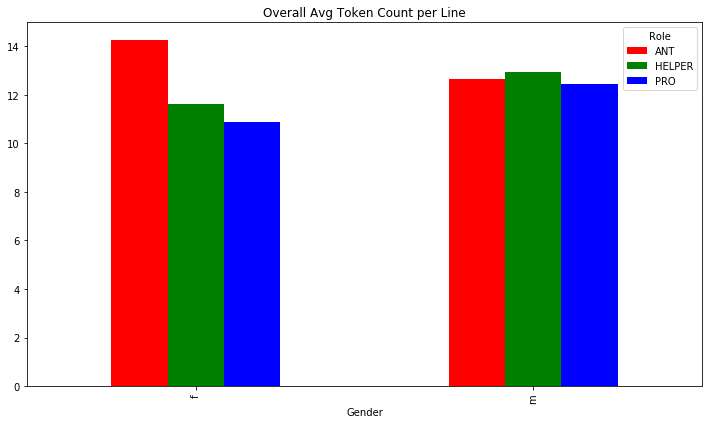

In [122]:
#female antagonists tend to have longer lines, while female protagonists and helpers tend to have shorter lines
role_lines_3 = movie_df_new.groupby(['Gender', 'Role'])["Token_Count"].describe()["mean"]
role_lines_3.unstack().plot.bar(color=['red', 'green', 'blue'], figsize = (10,6))
plt.title("Overall Avg Token Count per Line")
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\overall_avg_tok_gen_role.png")

In [85]:
#a different way to group the same data...
#it seems that role plays a large role (lol) in how long female speaker's lines are

In [86]:
total_lines_per_role = movie_df_new.groupby(['Year','Movie'])['Role'].value_counts()

Text(0, 0.5, 'Total Number of Lines')

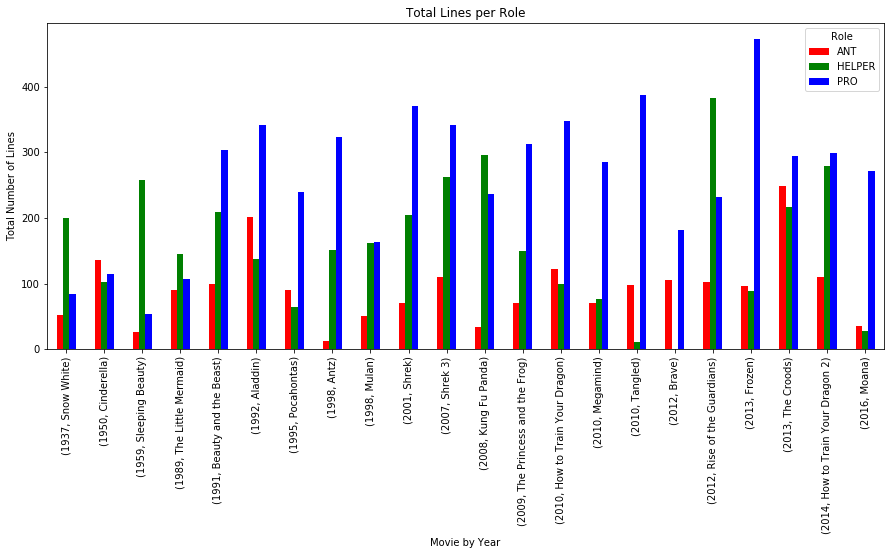

In [87]:
total_lines_per_role.unstack().plot.bar(color = ['red', 'green', 'blue'], figsize = (15, 6))
plt.title('Total Lines per Role')
plt.xlabel('Movie by Year')
plt.ylabel('Total Number of Lines')
plt.savefig(r'C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\total_lines_by_gen.png')

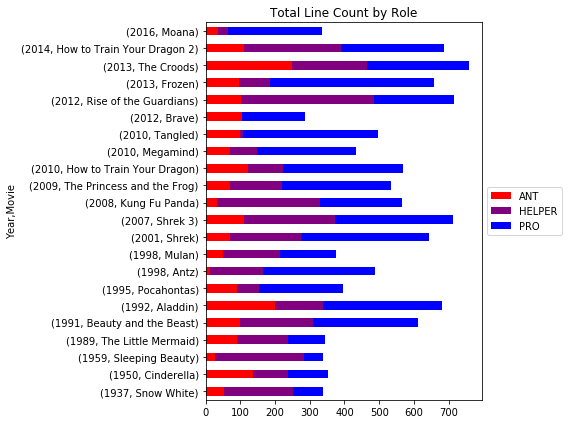

In [105]:
total_lines_per_role.unstack(level=2).plot.barh(figsize=(8,6), stacked=True, title="Total Line Count by Role",
                                           color=['red', 'purple', 'blue'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [88]:
num_char_per_role = movie_df.groupby(['Year','Movie','Role'])["Speaker"].unique().map(len)

In [89]:
avg_lines_per_role = total_lines_per_role.divide(num_char_per_role)
avg_lines_per_role = avg_lines_per_role.reindex(index = total_lines_per_role.index)
avg_lines_per_role

Year  Movie                       Role  
1937  Snow White                  HELPER     20.000000
                                  PRO        42.000000
                                  ANT        17.666667
1950  Cinderella                  ANT        27.200000
                                  PRO        57.500000
                                  HELPER     20.400000
1959  Sleeping Beauty             HELPER     64.500000
                                  PRO        27.000000
                                  ANT        26.000000
1989  The Little Mermaid          HELPER     36.250000
                                  PRO        53.500000
                                  ANT        15.166667
1991  Beauty and the Beast        PRO        75.750000
                                  HELPER     41.800000
                                  ANT        16.500000
1992  Aladdin                     PRO       170.500000
                                  ANT        28.714286
                        

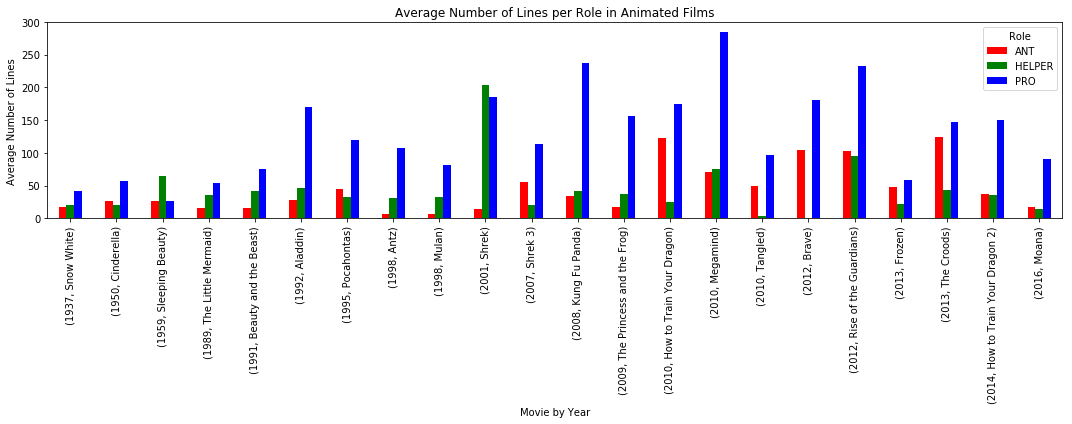

In [103]:
avg_lines_per_role.unstack().plot.bar(color = ['red', 'green', 'blue'], figsize=(15,6))
plt.title('Average Number of Lines per Role in Animated Films')
plt.ylabel('Average Number of Lines')
plt.xlabel('Movie by Year')
plt.tight_layout()
#plt.savefig(r'C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_num_line_by_gen.png')

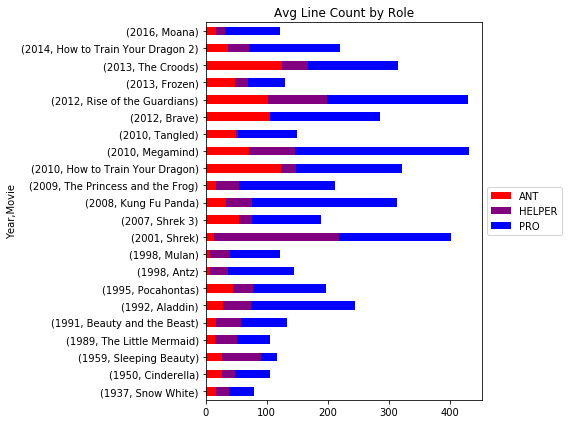

In [104]:
lines_by_role = avg_lines_per_role
lines_by_role.unstack(level=2).plot.barh(figsize=(8,6), stacked=True, title="Avg Line Count by Role",
                                           color=['red', 'purple', 'blue'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()